In [66]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import re, glob
import os, sys
from scipy import stats
import csv


In [124]:
# read the covid data file
covid_df = pd.read_csv("Resources/owid_covid_data.csv")                
 # Filter for country of your choice

covid_df.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
84305,ZWE,Africa,Zimbabwe,2021-04-22,38018.0,38.0,85.143,1555.0,0.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84306,ZWE,Africa,Zimbabwe,2021-04-23,38045.0,27.0,73.000,1556.0,1.0,0.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84307,ZWE,Africa,Zimbabwe,2021-04-24,38064.0,19.0,52.143,1556.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84308,ZWE,Africa,Zimbabwe,2021-04-25,38086.0,22.0,47.857,1557.0,1.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
84309,ZWE,Africa,Zimbabwe,2021-04-26,38102.0,16.0,34.714,1560.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [128]:
covid_2020_df = covid_df.loc[covid_df.date.str.contains(r'2020.*')]
covid_2020_df['Month'] = ''

<ipython-input-128-73698b43b3e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_2020_df['Month'] = ''


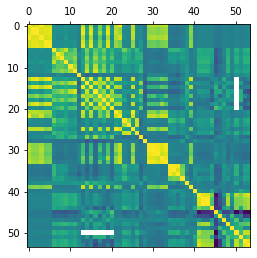

NameError: name 'df' is not defined

In [136]:
plt.matshow(covid_df.corr())
plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(covid_df.select_dtypes(['number']).shape[1]), covid_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(covid_df.select_dtypes(['number']).shape[1]), covid_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [139]:
covid_2020_df

TypeError: 'Series' object is not callable

In [130]:
# Filter data for 2020, and add a 'month' column
covid_2021_df = covid_df.loc[covid_df.date.str.contains(r'2021.*')]
covid_2021_df['Month'] = ''


<ipython-input-130-094136aa2c86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_2021_df['Month'] = ''


In [140]:
covid_2021_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month
312,AFG,Asia,Afghanistan,2021-01-01,51526.0,0.0,102.286,2191.0,0.0,7.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
313,AFG,Asia,Afghanistan,2021-01-02,51526.0,0.0,91.429,2191.0,0.0,6.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
314,AFG,Asia,Afghanistan,2021-01-03,51526.0,0.0,69.571,2191.0,0.0,4.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
315,AFG,Asia,Afghanistan,2021-01-04,53011.0,1485.0,247.286,2237.0,46.0,9.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
316,AFG,Asia,Afghanistan,2021-01-05,53105.0,94.0,250.714,2244.0,7.0,9.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1


In [141]:
# Extract the month from the 'date' column and add it to the new 'month' column, for sorting later

for index, row in covid_2020_df.iterrows():
    month, = re.findall(f"2020-(\d\d)-", row['date'])
    covid_2020_df.at[index, 'Month'] = int(month)  

covid_2020_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2


In [143]:

for index, row in covid_2021_df.iterrows():
    month, = re.findall(f"2021-(\d\d)-", row['date'])
    covid_2021_df.at[index, 'Month'] = int(month)  

covid_2021_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month
312,AFG,Asia,Afghanistan,2021-01-01,51526.0,0.0,102.286,2191.0,0.0,7.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
313,AFG,Asia,Afghanistan,2021-01-02,51526.0,0.0,91.429,2191.0,0.0,6.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
314,AFG,Asia,Afghanistan,2021-01-03,51526.0,0.0,69.571,2191.0,0.0,4.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
315,AFG,Asia,Afghanistan,2021-01-04,53011.0,1485.0,247.286,2237.0,46.0,9.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1
316,AFG,Asia,Afghanistan,2021-01-05,53105.0,94.0,250.714,2244.0,7.0,9.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,1


In [144]:
new_covid_2020_df = covid_2020_df.loc[:,["location","date","stringency_index","life_expectancy","human_development_index","total_cases","new_cases","total_deaths","new_deaths","Month"]]
new_covid_2020_df


,location,date,stringency_index,life_expectancy,human_development_index,total_cases,new_cases,total_deaths,new_deaths,Month
0,Afghanistan,2020-02-24,8.33,64.83,0.511,1.0,1.0,NaN,NaN,2
1,Afghanistan,2020-02-25,8.33,64.83,0.511,1.0,0.0,NaN,NaN,2
2,Afghanistan,2020-02-26,8.33,64.83,0.511,1.0,0.0,NaN,NaN,2
3,Afghanistan,2020-02-27,8.33,64.83,0.511,1.0,0.0,NaN,NaN,2
4,Afghanistan,2020-02-28,8.33,64.83,0.511,1.0,0.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...
84189,Zimbabwe,2020-12-27,69.44,61.49,0.571,13077.0,114.0,349.0,8.0,12
84190,Zimbabwe,2020-12-28,69.44,61.49,0.571,13148.0,71.0,354.0,5.0,12
84191,Zimbabwe,2020-12-29,69.44,61.49,0.571,13325.0,177.0,359.0,5.0,12
84192,Zimbabwe,2020-12-30,69.44,61.49,0.571,13625.0,300.0,360.0,1.0,12


In [145]:
new_covid_2020_df = new_covid_2020_df.dropna()
new_covid_2020_df

,location,date,stringency_index,life_expectancy,human_development_index,total_cases,new_cases,total_deaths,new_deaths,Month
27,Afghanistan,2020-03-22,41.67,64.83,0.511,34.0,4.0,1.0,1.0,3
28,Afghanistan,2020-03-23,41.67,64.83,0.511,41.0,7.0,1.0,0.0,3
29,Afghanistan,2020-03-24,50.93,64.83,0.511,43.0,2.0,1.0,0.0,3
30,Afghanistan,2020-03-25,59.26,64.83,0.511,76.0,33.0,2.0,1.0,3
31,Afghanistan,2020-03-26,59.26,64.83,0.511,80.0,4.0,3.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...
84189,Zimbabwe,2020-12-27,69.44,61.49,0.571,13077.0,114.0,349.0,8.0,12
84190,Zimbabwe,2020-12-28,69.44,61.49,0.571,13148.0,71.0,354.0,5.0,12
84191,Zimbabwe,2020-12-29,69.44,61.49,0.571,13325.0,177.0,359.0,5.0,12
84192,Zimbabwe,2020-12-30,69.44,61.49,0.571,13625.0,300.0,360.0,1.0,12


In [146]:
# Stat¡scs of stringency

new_covid_2020_df.describe()

,stringency_index,life_expectancy,human_development_index,total_cases,new_cases,total_deaths,new_deaths
count,43792.000000,43792.000000,43792.000000,4.379200e+04,43792.000000,43792.000000,43792.000000
mean,62.181181,73.255159,0.734245,1.736439e+05,1880.033842,5088.069442,41.488902
std,19.965028,7.571194,0.153972,8.570113e+05,9262.193404,20465.312429,167.927013
min,0.000000,53.280000,0.394000,1.000000e+00,-46076.000000,1.000000,-1918.000000
25%,48.150000,67.270000,0.611000,1.728000e+03,9.000000,33.000000,0.000000
50%,64.350000,74.790000,0.759000,9.767000e+03,100.000000,181.000000,1.000000
75%,78.240000,78.740000,0.854000,7.378100e+04,688.000000,1483.000000,12.000000
max,100.000000,84.630000,0.957000,2.009936e+07,251969.000000,352085.000000,4143.000000


In [155]:
grouped_df= new_covid_2020_df.groupby("stringency_index").max()
grouped_df.head(11)

,location,date,life_expectancy,human_development_index,total_cases,new_cases,total_deaths,new_deaths,Month
stringency_index,,,,,,,,,
0.00,Thailand,2020-03-14,77.15,0.783,109.0,34.0,2.0,2.0,3
2.78,Mexico,2020-03-20,82.43,0.929,203.0,46.0,4.0,2.0,3
5.56,United States,2020-04-03,82.66,0.926,351.0,47.0,4.0,1.0,4
6.48,Tanzania,2020-12-31,65.46,0.529,509.0,0.0,21.0,0.0,12
8.33,United States,2020-12-31,78.86,0.926,6046.0,141.0,165.0,2.0,12
9.26,Afghanistan,2020-11-08,64.83,0.511,42159.0,132.0,1565.0,6.0,11
11.11,United States,2020-09-30,83.56,0.955,5170.0,489.0,151.0,7.0,9
12.04,Tanzania,2020-12-31,65.46,0.529,51526.0,298.0,2191.0,27.0,12
12.96,United Kingdom,2020-04-05,81.32,0.932,3077.0,480.0,43.0,19.0,4


In [156]:
top_higher_stringency = grouped_df.sort_values(by=['stringency_index'], ascending=True)
top_higher_stringency

,location,date,life_expectancy,human_development_index,total_cases,new_cases,total_deaths,new_deaths,Month
stringency_index,,,,,,,,,
0.00,Thailand,2020-03-14,77.15,0.783,109.0,34.0,2.0,2.0,3
2.78,Mexico,2020-03-20,82.43,0.929,203.0,46.0,4.0,2.0,3
5.56,United States,2020-04-03,82.66,0.926,351.0,47.0,4.0,1.0,4
6.48,Tanzania,2020-12-31,65.46,0.529,509.0,0.0,21.0,0.0,12
8.33,United States,2020-12-31,78.86,0.926,6046.0,141.0,165.0,2.0,12
9.26,Afghanistan,2020-11-08,64.83,0.511,42159.0,132.0,1565.0,6.0,11
11.11,United States,2020-09-30,83.56,0.955,5170.0,489.0,151.0,7.0,9
12.04,Tanzania,2020-12-31,65.46,0.529,51526.0,298.0,2191.0,27.0,12
12.96,United Kingdom,2020-04-05,81.32,0.932,3077.0,480.0,43.0,19.0,4


In [160]:
total_deaths_italy_2020 = new_covid_2020_df.loc[(new_covid_2020_df["location"]=="Italy")]
total_deaths_italy_2020

,location,date,stringency_index,life_expectancy,human_development_index,total_cases,new_cases,total_deaths,new_deaths,Month
37817,Italy,2020-02-21,27.78,83.51,0.892,20.0,17.0,1.0,1.0,2
37818,Italy,2020-02-22,37.04,83.51,0.892,62.0,42.0,2.0,1.0,2
37819,Italy,2020-02-23,69.91,83.51,0.892,155.0,93.0,3.0,1.0,2
37820,Italy,2020-02-24,69.91,83.51,0.892,229.0,74.0,7.0,4.0,2
37821,Italy,2020-02-25,69.91,83.51,0.892,322.0,93.0,10.0,3.0,2
...,...,...,...,...,...,...,...,...,...,...
38127,Italy,2020-12-27,84.26,83.51,0.892,2047696.0,8937.0,71925.0,305.0,12
38128,Italy,2020-12-28,80.56,83.51,0.892,2056277.0,8581.0,72370.0,445.0,12
38129,Italy,2020-12-29,80.56,83.51,0.892,2067487.0,11210.0,73029.0,659.0,12
38130,Italy,2020-12-30,80.56,83.51,0.892,2083689.0,16202.0,73604.0,575.0,12


In [167]:
italy_df= total_deaths_italy_2020[["Month","stringency_index","total_deaths"]]
italy_df.head(10)

,Month,stringency_index,total_deaths
37817,2,27.78,1.0
37818,2,37.04,2.0
37819,2,69.91,3.0
37820,2,69.91,7.0
37821,2,69.91,10.0
37822,2,69.91,12.0
37823,2,69.91,17.0
37824,2,69.91,21.0
37825,2,69.91,29.0
37826,3,69.91,34.0


In [164]:
italy_df.plot

In [ ]:
s')
ax1.set_ylabel('Valence')
ax1.set_ylim([.2, .8])
ax1.plot(months, valence_2020, label="Valence Scores", marker='x', color=color)                       
                        
ax2 = ax1.twinx() 
ax2.set_ylabel('New Cases Per Month')
ax2.set_ylim([0, nz_covid_2020.max()+20])
ax2.plot(months, nz_covid_2020, label="New cases", marker='s')

fig.suptitle('Italy: SPOTIFY LISTENER VALENCE PREFERENCE BY MONTH COMPARED TO NEW COVID CASES')
plt.legend()

plt.show()


In [90]:
top_lower_stringency = top_higher_stringency.tail(10)
top_lower_stringency

,location,date,life_expectancy,human_development_index,total_cases,new_cases,total_deaths,new_deaths
stringency_index,,,,,,,,
13.89,Senegal,2021-04-26,82.66,0.929,37833.0,315.0,1013.0,8.0
12.96,United Kingdom,2021-04-19,81.32,0.932,5787.0,480.0,75.0,19.0
12.04,Tanzania,2021-03-23,65.46,0.529,56177.0,1485.0,2466.0,46.0
11.11,Vietnam,2021-04-26,83.56,0.955,5170.0,489.0,151.0,7.0
9.26,Afghanistan,2020-11-08,64.83,0.511,42159.0,132.0,1565.0,6.0
8.33,United States,2021-04-12,78.86,0.926,56779.0,141.0,2512.0,11.0
6.48,Tanzania,2021-02-01,65.46,0.529,509.0,0.0,21.0,0.0
5.56,United States,2020-04-03,82.66,0.926,351.0,47.0,4.0,1.0
2.78,Tanzania,2021-04-26,82.43,0.929,509.0,46.0,21.0,2.0


In [91]:
top_lower_stringency = grouped_df.sort_values(by=['stringency_index'], ascending=True)
top_lower_stringency.head(30)

,location,date,life_expectancy,human_development_index,total_cases,new_cases,total_deaths,new_deaths
stringency_index,,,,,,,,
0.00,Thailand,2020-03-14,77.15,0.783,109.0,34.0,2.0,2.0
2.78,Tanzania,2021-04-26,82.43,0.929,509.0,46.0,21.0,2.0
5.56,United States,2020-04-03,82.66,0.926,351.0,47.0,4.0,1.0
6.48,Tanzania,2021-02-01,65.46,0.529,509.0,0.0,21.0,0.0
8.33,United States,2021-04-12,78.86,0.926,56779.0,141.0,2512.0,11.0
9.26,Afghanistan,2020-11-08,64.83,0.511,42159.0,132.0,1565.0,6.0
11.11,Vietnam,2021-04-26,83.56,0.955,5170.0,489.0,151.0,7.0
12.04,Tanzania,2021-03-23,65.46,0.529,56177.0,1485.0,2466.0,46.0
12.96,United Kingdom,2021-04-19,81.32,0.932,5787.0,480.0,75.0,19.0


In [76]:
# Top deaths per country 2020
top_countries_deaths = covid_df.loc[:,["location", "date","total_cases","new_cases","total_deaths", "total_cases_per_million"]]
grouped_deaths = top_countries_deaths.groupby(["location"]).min()
top_deaths_per_country = grouped_deaths.sort_values(by=['total_deaths'], ascending=False)
top_deaths_per_country.head(20)


,date,total_cases,new_cases,total_deaths,total_cases_per_million
location,,,,,
Asia,2020-01-22,556.0,0.0,17.0,0.120
China,2020-01-22,548.0,-1.0,17.0,0.381
World,2020-01-22,557.0,0.0,17.0,0.071
South Sudan,2020-04-05,1.0,0.0,4.0,0.089
Vietnam,2020-01-23,2.0,0.0,3.0,0.021
Norway,2020-02-23,1.0,0.0,3.0,0.184
Romania,2020-02-26,1.0,0.0,3.0,0.052
Peru,2020-01-06,1.0,0.0,3.0,0.030
Belgium,2020-02-04,1.0,0.0,3.0,0.086


In [63]:
# Top deaths per country 2021
top_countries_deaths = covid_df.loc[:,["location", "date","total_cases","new_cases","total_deaths", "total_cases_per_million"]]
grouped_deaths = top_countries_deaths.groupby(["location"]).max()
top_deaths_per_country = grouped_deaths.sort_values(by=['total_deaths'], ascending=False)
top_deaths_per_country.head(20)


,date,total_cases,new_cases,total_deaths,total_cases_per_million
location,,,,,
World,2021-04-26,147872402.0,899755.0,3120403.0,18970.650
Europe,2021-04-26,44263885.0,346447.0,1003506.0,59122.564
North America,2021-04-26,37229141.0,327335.0,841942.0,62879.393
European Union,2021-04-26,30284165.0,274748.0,679507.0,68066.684
South America,2021-04-26,24325791.0,162919.0,653917.0,56471.826
United States,2021-04-26,32124869.0,300310.0,572674.0,97053.209
Asia,2021-04-26,37496027.0,482745.0,499552.0,8081.306
Brazil,2021-04-26,14369423.0,100158.0,391936.0,67601.915
Mexico,2021-04-26,2329534.0,28115.0,215113.0,18067.822


In [78]:
# Compare valence scores with covide infection rate

covid2_df = pd.read_csv("Resources/owid_covid_data.csv")                # read the covid data file

country_covid2_df = covid_df.loc[covid_df['location'] == 'Italy']   # Filter for country of your choice

country_covid2_df.head(10)








,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
37796,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37797,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37798,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37799,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37800,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37801,ITA,Europe,Italy,2020-02-05,2.0,0.0,0.286,NaN,NaN,0.0,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37802,ITA,Europe,Italy,2020-02-06,2.0,0.0,0.286,NaN,NaN,0.0,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37803,ITA,Europe,Italy,2020-02-07,3.0,1.0,0.143,NaN,NaN,0.0,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37804,ITA,Europe,Italy,2020-02-08,3.0,0.0,0.143,NaN,NaN,0.0,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
37805,ITA,Europe,Italy,2020-02-09,3.0,0.0,0.143,NaN,NaN,0.0,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892


In [79]:
# Filter data for 2020, and add a 'month' column

country_covid__2020_df = country_covid2_df[country_covid2_df.date.str.contains(r'2020.*')]

country_covid__2020_df['Month'] = ''
country_covid__2020_df.head()

<ipython-input-79-fc18ec362bc0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_covid__2020_df['Month'] = ''


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month
37796,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,
37797,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,
37798,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,
37799,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,
37800,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,


In [80]:
# Extract the month from the 'date' column and add it to the new 'month' column, for sorting later

for index, row in country_covid__2020_df.iterrows():
    month, = re.findall(f"2020-(\d\d)-", row['date'])
    country_covid__2020_df.at[index, 'Month'] = int(month)  

country_covid__2020_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Month
37796,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,1
37797,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,2
37798,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,2
37799,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,2
37800,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,2


In [81]:
# Create a groupby to get the sum of new cases in each month

country_covid__2020_groupby = country_covid__2020_df.groupby(['Month'], as_index=False)['new_cases'].sum()
country_covid__2020_groupby

,Month,new_cases
0,1,2.0
1,2,1126.0
2,3,104664.0
3,4,99671.0
4,5,27534.0
5,6,7581.0
6,7,6959.0
7,8,21677.0
8,9,45647.0
9,10,364569.0


In [83]:
# TIP: This next section is to add missing months. In the case of New Zealand, there was no data for January
# For other countries, it might vary. Here's how I added January to the dataframe:

#country_covid__2020_groupby.loc[-1] = [1, 0]             # This adds a 1 (month of January) in the first columne 
                                                         # index 0), in the last row of the dataframe. 

country_covid__2020_groupby.index = country_covid__2020_groupby.index + 1   # shifts the index
country_covid__2020_groupby = country_covid__2020_groupby.sort_index()      # sorts by index

country_covid__2020_groupby = country_covid__2020_groupby.rename(columns={"new_cases": "New Cases"})

country_covid__2020_groupby

,Month,New Cases
1,1,0.0
2,1,2.0
3,2,1126.0
4,3,104664.0
5,4,99671.0
6,5,27534.0
7,6,7581.0
8,7,6959.0
9,8,21677.0
10,9,45647.0
